In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn

In [2]:
df = pd.read_csv(r"D:\Data Science\science\Dataset\heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
x = df.drop(columns = 'DEATH_EVENT')
y = df['DEATH_EVENT']

In [5]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [7]:
from sklearn.preprocessing import RobustScaler
Rc = RobustScaler()
x[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']] = Rc.fit_transform(x[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']])
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.789474,0,0.713212,0,-1.200000,1,0.032967,1.6,-1.166667,1,0,-0.853846
1,-0.263158,0,16.350161,0,0.000000,0,0.014923,0.0,-0.166667,1,0,-0.838462
2,0.263158,0,-0.223416,0,-1.200000,0,-1.098901,0.4,-1.333333,1,1,-0.830769
3,-0.526316,1,-0.298604,0,-1.200000,0,-0.571429,1.6,0.000000,1,0,-0.830769
4,0.263158,1,-0.193340,1,-1.200000,0,0.714286,3.2,-3.500000,0,0,-0.823077
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.105263,0,-0.406015,1,0.000000,1,-1.175824,0.0,1.000000,1,1,1.192308
295,-0.263158,0,3.372718,0,0.000000,0,0.087912,0.2,0.333333,0,0,1.200000
296,-0.789474,0,3.888292,1,1.466667,0,5.274725,-0.6,0.166667,0,0,1.253846
297,-0.789474,0,4.646617,0,0.000000,0,-1.340659,0.6,0.500000,1,1,1.269231


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [9]:
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
206,-1.052632,1,-0.320086,0,0.133333,0,-0.395604,-0.60,0.666667,0,0,0.553846
188,0.035105,1,-0.212675,1,0.133333,1,-0.670330,-0.20,-0.166667,0,0,0.438462
12,-0.789474,1,1.570354,0,-0.533333,0,-1.384615,0.00,0.000000,1,0,-0.800000
219,-0.263158,0,0.713212,1,-0.200000,1,1.197802,-0.80,0.500000,0,0,0.630769
237,0.526316,0,-0.038668,0,-0.533333,0,-0.978022,0.20,-0.833333,1,0,0.730769
136,0.263158,1,-0.410311,1,1.466667,0,-0.989011,-0.40,0.000000,0,0,-0.061538
228,0.263158,0,-0.416756,0,-0.866667,0,-0.274725,7.80,-1.166667,0,0,0.707692
205,-0.526316,1,-0.178303,1,0.466667,0,1.098901,-0.20,-0.166667,0,0,0.553846
52,0.000000,0,7.978518,1,1.600000,0,0.014923,11.40,1.500000,0,0,-0.553846
108,0.157895,0,1.473684,0,0.000000,0,0.461538,0.00,-0.666667,1,1,-0.207692


In [10]:
y_test

206    0
188    0
12     1
219    0
237    0
136    0
228    0
205    0
52     1
108    0
240    0
15     1
184    1
246    1
22     1
74     1
269    0
90     0
227    0
255    0
190    0
103    0
124    1
129    0
220    1
116    0
194    1
285    0
294    0
249    0
92     0
66     1
8      1
122    0
217    1
150    1
176    0
182    1
298    0
5      1
263    0
89     0
81     0
34     1
55     1
139    0
234    0
64     0
7      1
45     1
73     0
291    0
173    0
106    0
59     1
230    1
168    0
26     1
283    0
153    0
Name: DEATH_EVENT, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [13]:
y_test.value_counts()

DEATH_EVENT
0    37
1    23
Name: count, dtype: int64

In [19]:
y_train.value_counts()

DEATH_EVENT
0    166
1     73
Name: count, dtype: int64

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[36 11]
 [ 1 12]]


In [15]:
accuracy_score(y_pred,y_test)

0.8

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        47
           1       0.52      0.92      0.67        13

    accuracy                           0.80        60
   macro avg       0.75      0.84      0.76        60
weighted avg       0.88      0.80      0.82        60



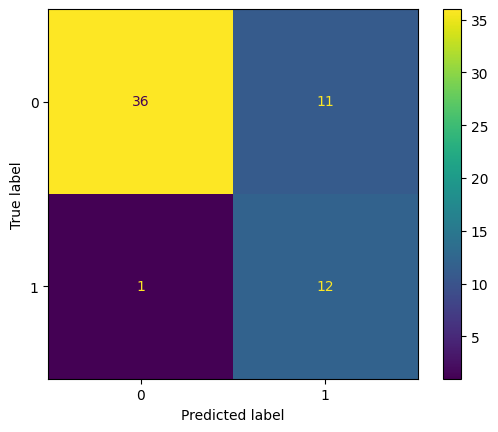

In [17]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['0','1'])
cm_display.plot()

<Axes: >

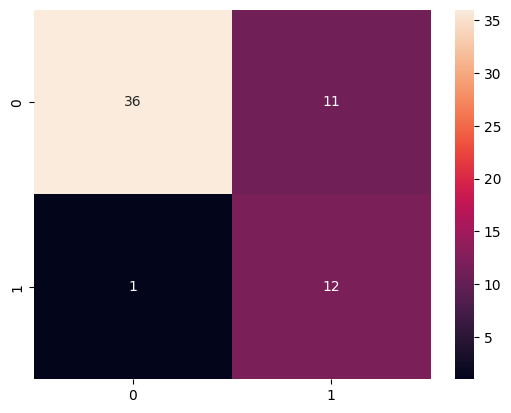

In [18]:
import seaborn as sns
sns.heatmap(cm,annot = True)